In [1]:
import pandas as pd

origin_df = pd.read_excel('result_1013.xlsx')
df = origin_df.copy()
df

,Unnamed: 0,날짜,시가,고가,저가,종가,거래량,BPS,PER,PBR,...,종목명,분기_x,자산,종목분기,종목코드_y,회사명,업종명,결산기준일,매출,분기_y
0,0,2017-01-02,2820,3035,2790,3000,478672,846,0.0,3.55,...,3S,2017Q1,NaN,0603102017Q1,60310.0,3S,전자부품 제조업,2017-03-31,358702446.0,2017Q1
1,1,2017-01-03,3070,3070,2900,3030,309507,846,0.0,3.58,...,3S,2017Q1,NaN,0603102017Q1,60310.0,3S,전자부품 제조업,2017-03-31,358702446.0,2017Q1
2,2,2017-01-04,3030,3095,2980,3090,248971,846,0.0,3.65,...,3S,2017Q1,NaN,0603102017Q1,60310.0,3S,전자부품 제조업,2017-03-31,358702446.0,2017Q1
3,3,2017-01-05,3090,3300,3050,3090,928979,846,0.0,3.65,...,3S,2017Q1,NaN,0603102017Q1,60310.0,3S,전자부품 제조업,2017-03-31,358702446.0,2017Q1
4,4,2017-01-06,3090,3095,3015,3015,202702,846,0.0,3.56,...,3S,2017Q1,NaN,0603102017Q1,60310.0,3S,전자부품 제조업,2017-03-31,358702446.0,2017Q1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87539,87539,2020-12-23,6744,8514,6744,7160,30380898,2936,0.0,2.76,...,강스템바이오텍,2020Q4,6.809730e+10,2177302020Q4,217730.0,강스템바이오텍,기초 의약물질 및 생물학적 제제 제조업,2020-12-31,56912500.0,2020Q4
87540,87540,2020-12-24,7222,7231,6673,6727,3581461,2936,0.0,2.59,...,강스템바이오텍,2020Q4,6.809730e+10,2177302020Q4,217730.0,강스템바이오텍,기초 의약물질 및 생물학적 제제 제조업,2020-12-31,56912500.0,2020Q4
87541,87541,2020-12-28,6744,6797,6372,6417,1446545,2936,0.0,2.47,...,강스템바이오텍,2020Q4,6.809730e+10,2177302020Q4,217730.0,강스템바이오텍,기초 의약물질 및 생물학적 제제 제조업,2020-12-31,56912500.0,2020Q4
87542,87542,2020-12-29,6390,6682,6390,6585,824485,2936,0.0,2.53,...,강스템바이오텍,2020Q4,6.809730e+10,2177302020Q4,217730.0,강스템바이오텍,기초 의약물질 및 생물학적 제제 제조업,2020-12-31,56912500.0,2020Q4


In [2]:
# 눌값을 다 문자열 0으로 채워줍니다.
# 그럼에도 불구하고 매출이 없으면 0으로 잡음 - 다만 최대한 채우도록 노력하기

df.fillna(0, inplace=True) # inplace = True를 잊으면 안 됩니다!

# 자산 채우기, 매출 0값 이하인 행 버리기
df = df[df['자산']>0]

# 매출 없는 데이터 삭제
df = df[df['매출'] > 0]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87544 entries, 0 to 87543
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  87544 non-null  int64         
 1   날짜          87544 non-null  datetime64[ns]
 2   시가          87544 non-null  int64         
 3   고가          87544 non-null  int64         
 4   저가          87544 non-null  int64         
 5   종가          87544 non-null  int64         
 6   거래량         87544 non-null  int64         
 7   BPS         87544 non-null  int64         
 8   PER         87544 non-null  float64       
 9   PBR         87544 non-null  float64       
 10  EPS         87544 non-null  int64         
 11  DIV         87544 non-null  float64       
 12  DPS         87544 non-null  int64         
 13  종목코드_x      87544 non-null  int64         
 14  종목명         87544 non-null  object        
 15  분기_x        87544 non-null  object        
 16  자산          87544 non-

In [7]:
# one-hot-encoding
df = pd.get_dummies(df, columns = ['업종명'] )
for col in df.columns:
    if col[:3]=='업종명':
        df.rename(columns = {col:col[4:]}, inplace=True)
df.columns

Index(['Unnamed: 0', '날짜', '시가', '고가', '저가', '종가', '거래량', 'BPS', 'PER', 'PBR',
       'EPS', 'DIV', 'DPS', '종목코드_x', '종목명', '분기_x', '자산', '종목분기', '종목코드_y',
       '회사명', '결산기준일', '매출', '분기_y', '1차 비철금속 제조업', '가정용품 도매업', '건물 건설업',
       '광고업', '교육지원 서비스업', '기계장비 및 관련 물품 도매업', '기록매체 복제업',
       '기초 의약물질 및 생물학적 제제 제조업', '기초 화학물질 제조업', '기초화학물질 제조업', '기타 금속 가공제품 제조업',
       '기타 금속가공제품 제조업', '기타 금융업', '기타 비금속 광물제품 제조업', '기타 사업지원 서비스업',
       '기타 섬유제품 제조업', '기타 전문 도매업', '기타 정보 서비스업', '기타 화학제품 제조업', '반도체 제조업',
       '상품 종합 도매업', '생활용품 도매업', '서적, 잡지 및 기타 인쇄물 출판업', '소프트웨어 개발 및 공급업',
       '영상 및 음향기기 제조업', '영화, 비디오물, 방송프로그램 제작 및 배급업', '오디오물 출판 및 원판 녹음업',
       '음·식료품 및 담배 도매업', '음ㆍ식료품 및 담배 도매업', '의약품 제조업', '일반 교습 학원',
       '일반 목적용 기계 제조업', '일차전지 및 축전지 제조업', '자동차 부품 제조업', '자동차 신품 부품 제조업',
       '자료처리, 호스팅, 포털 및 기타 인터넷 정보매개 서비스업', '자연과학 및 공학 연구개발업', '전구 및 조명장치 제조업',
       '전자부품 제조업', '종합 소매업', '텔레비전 방송업', '토목 건설업', '통신 및 방송 장비 제조업',
       '특수 목적용 기계 제조업', '폐기물 처리업', '플라스틱제품 제조업', '합성고무 

In [92]:
# 데이터를 년도 별로 나누고, 필요한 열만 가져오기
df_2017 = df[df['날짜']<'2018-01-01'].drop(['Unnamed: 0','종목명', '분기_y', '종목분기', '종목코드_y', '결산기준일'], axis=1)
df_2018 = df[(df['날짜']>='2018-01-01') & (df['날짜']<'2019-01-01')].drop(['Unnamed: 0','종목명', '분기_y', '종목분기', '종목코드_y', '결산기준일'], axis=1)
df_2019 = df[(df['날짜']>='2019-01-01') & (df['날짜']<'2020-01-01')].drop(['Unnamed: 0','종목명', '분기_y', '종목분기', '종목코드_y', '결산기준일'], axis=1)
df_2020 = df[(df['날짜']>='2020-01-01') & (df['날짜']<'2021-01-01')].drop(['Unnamed: 0','종목명', '분기_y', '종목분기', '종목코드_y', '결산기준일'], axis=1)
df_2020

,날짜,시가,고가,저가,종가,거래량,BPS,PER,PBR,EPS,...,전구 및 조명장치 제조업,전자부품 제조업,종합 소매업,텔레비전 방송업,토목 건설업,통신 및 방송 장비 제조업,특수 목적용 기계 제조업,폐기물 처리업,플라스틱제품 제조업,합성고무 및 플라스틱 물질 제조업
733,2020-01-02,2820,2845,2780,2795,131742,768,87.34,3.64,32,...,0,0,0,0,0,0,1,0,0,0
734,2020-01-03,2795,2825,2775,2810,100374,768,87.81,3.66,32,...,0,0,0,0,0,0,1,0,0,0
735,2020-01-06,2800,2805,2650,2685,201779,768,83.91,3.50,32,...,0,0,0,0,0,0,1,0,0,0
736,2020-01-07,2685,2745,2685,2745,62241,768,85.78,3.57,32,...,0,0,0,0,0,0,1,0,0,0
737,2020-01-08,2720,2745,2580,2585,203909,768,80.78,3.37,32,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87539,2020-12-23,6744,8514,6744,7160,30380898,2936,0.00,2.76,0,...,0,0,0,0,0,0,0,0,0,0
87540,2020-12-24,7222,7231,6673,6727,3581461,2936,0.00,2.59,0,...,0,0,0,0,0,0,0,0,0,0
87541,2020-12-28,6744,6797,6372,6417,1446545,2936,0.00,2.47,0,...,0,0,0,0,0,0,0,0,0,0
87542,2020-12-29,6390,6682,6390,6585,824485,2936,0.00,2.53,0,...,0,0,0,0,0,0,0,0,0,0


In [93]:
# 매출이 증가한 것만 보자 매출 증가율 열을 만들자
df_2018['sales_pct_change'] = df_2018.sort_values(['날짜', '분기_x']).groupby(['종목코드_x']).매출.pct_change()
df_2018_up = df_2018[df_2018['sales_pct_change'] > 0]
df_2018_up

,날짜,시가,고가,저가,종가,거래량,BPS,PER,PBR,EPS,...,전자부품 제조업,종합 소매업,텔레비전 방송업,토목 건설업,통신 및 방송 장비 제조업,특수 목적용 기계 제조업,폐기물 처리업,플라스틱제품 제조업,합성고무 및 플라스틱 물질 제조업,sales_pct_change
425,2018-10-01,2670,2730,2595,2660,197697,704,0.00,3.78,0,...,0,0,0,0,0,1,0,0,0,0.459543
2200,2018-04-02,28150,28250,27150,27150,199056,0,0.00,0.00,0,...,0,0,0,0,0,1,0,0,0,0.257830
2260,2018-07-02,20800,20850,19650,19650,147815,5856,14.09,3.36,1395,...,0,0,0,0,0,1,0,0,0,0.184238
3181,2018-04-02,8150,8620,8100,8540,66676,5373,18.05,1.59,473,...,0,0,0,0,1,0,0,0,0,0.973028
3302,2018-10-01,8400,8650,8250,8490,29737,5465,1698.00,1.55,5,...,0,0,0,0,1,0,0,0,0,1.344609
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84905,2018-04-02,10203,10299,10011,10108,186071,8715,7.50,1.20,1400,...,0,0,0,0,1,0,0,0,0,0.182290
84965,2018-07-02,7392,7402,7007,7028,200554,9317,15.37,0.78,475,...,0,0,0,0,1,0,0,0,0,0.083337
85026,2018-10-01,7372,7412,7055,7172,68817,9317,15.68,0.80,475,...,0,0,0,0,1,0,0,0,0,0.100232
85946,2018-07-02,1386,1415,1277,1311,184026,348,0.00,3.97,0,...,0,0,0,0,0,0,0,0,0,0.506171


In [94]:
# 상관분석
df_2018_up.reset_index(drop=True, inplace=True)
corr = df_2018_up[['매출', '종가', 'BPS', '자산']].corr(method = 'pearson')
corr


,매출,종가,BPS,자산
매출,1.000000,0.562691,0.712763,0.831472
종가,0.562691,1.000000,0.761228,0.781634
BPS,0.712763,0.761228,1.000000,0.840840
자산,0.831472,0.781634,0.840840,1.000000


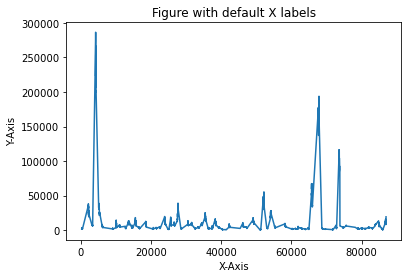

In [95]:
import matplotlib.pyplot as plt 

x=df_2018.index
y=df_2018.종가

plt.plot(x,y)
plt.xlabel("X-Axis")
plt.ylabel("Y-Axis")
plt.title("Figure with default X labels")
plt.show()

In [96]:
df_2018.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16696 entries, 243 to 86987
Data columns (total 65 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   날짜                                16696 non-null  datetime64[ns]
 1   시가                                16696 non-null  int64         
 2   고가                                16696 non-null  int64         
 3   저가                                16696 non-null  int64         
 4   종가                                16696 non-null  int64         
 5   거래량                               16696 non-null  int64         
 6   BPS                               16696 non-null  int64         
 7   PER                               16696 non-null  float64       
 8   PBR                               16696 non-null  float64       
 9   EPS                               16696 non-null  int64         
 10  DIV                               16696 non-



### 데이터 나누기(train, test, y)

In [97]:
# 원하는 행만 가져오기
# 데이터를 년도 별로 분기 3은 트레이닝 나머지는  테스트 데이터로 만들고 학습


# 학습 데이터
X_train = df_2018[df_2018['분기_x']!="2018Q4"].drop(['종가', '날짜', '분기_x', '회사명', 'sales_pct_change'], axis='columns')
# 테스트 데이터
X_test = df_2018[df_2018['분기_x']=="2018Q4"].drop(['종가', '날짜', '분기_x', '회사명', 'sales_pct_change'], axis='columns')
# 타깃 변수
y_train = df_2018[df_2018['분기_x']!="2018Q4"]['종가']

In [98]:
display(X_train.shape)
display(X_test.shape)
display(y_train.shape)

(12480, 60)

(4216, 60)

(12480,)

In [99]:

%%time

from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state=1217)
# 모델 학습
rf_model.fit(X_train, y_train)
# 예측값 생성
y_test = rf_model.predict(X_test)

Wall time: 7.39 s


In [100]:

%%time

from xgboost import XGBRegressor

xgb_model = XGBRegressor(random_state=1217)
# 모델 학습
xgb_model.fit(X_train, y_train)
# 예측값 생성
y_test = xgb_model.predict(X_test)

Wall time: 519 ms


In [103]:
input_var1 = X_train.columns

In [102]:
%%time
import numpy as np

from sklearn.model_selection import cross_val_score

rf_model = RandomForestRegressor(random_state=1217)

# cv=5인 교차 검증
scores = cross_val_score(rf_model, X_train, y_train, cv=5, n_jobs=-1,
                         scoring = 'neg_mean_squared_error')

# 성능 확인
print('cross_val_score \n{}'.format(np.sqrt(-scores)))
print('cross_val_score.mean \n{:.3f}'.format(np.sqrt(-scores.mean())))

cross_val_score 
[25402.69530945   360.62961735   540.23895728 12689.47336697
 20863.17624843]
cross_val_score.mean 
15760.798
Wall time: 7.59 s


In [106]:

%%time
from sklearn.metrics import mean_squared_error
# 두 번째 모델 정의
model2 = RandomForestRegressor(random_state=1217, max_features=8, 
                               min_samples_leaf=1, n_estimators=500, n_jobs=-1)
# 모델 학습
model2.fit(X_train[input_var1], y_train)
# 예측값 생성
pred2 = model2.predict(X_train[input_var1])
# 성능 확인
np.sqrt(mean_squared_error(y_train, pred2))

Wall time: 1.56 s


112.57179499376552

In [109]:
# X_test 데이터에 대한 예측값 생성
y_pred2 = model2.predict(X_test[input_var1])

X_test['종가']= y_pred2
# 'submission' 폴더에 CSV 파일 저장
X_test.to_csv('model2_rf.csv', index = False)

In [116]:
df_result = X_test['종가'] /df_2018[df_2018['분기_x']=="2018Q4"]['종가']
df_result.mean()

1.2122261975999047

In [112]:
df_2018[df_2018['분기_x']=="2018Q4"]['종가']

425      2660
426      2605
427      2620
428      2555
429      2595
         ... 
86064     622
86065     605
86066     588
86067     602
86068     620
Name: 종가, Length: 4216, dtype: int64